In [ ]:
%cd "D:\Brant_analysis"   

[WinError 2] 系统找不到指定的文件。: 'D:\\Brant_analysis # 需要先进入对应的文件夹'
d:\Brant_analysis


In [ ]:
import importlib
import pandas as pd
import analysis_functions as af
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA
from scipy.signal import savgol_filter
from scipy import stats
import os
import pickle
from matplotlib.animation import FuncAnimation
from scipy.ndimage import gaussian_filter1d

In [3]:
desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\code\v1_ctldata.pkl")
with open(desktop_path, 'rb') as f:
    data = pickle.load(f)

desktop_path = os.path.expanduser(r"C:\Users\HAOXUAN YIN\Desktop\code\v1_tstdata.pkl")
with open(desktop_path, 'rb') as f:
    data1 = pickle.load(f)

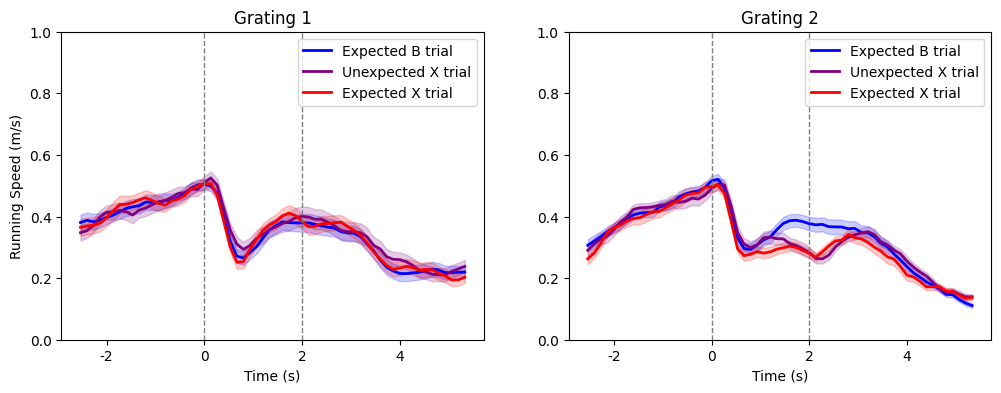

In [119]:
# speed at gratings averaged over all animals

unexp_grat = {}
exp_grat = {}
for ani in data:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data[ani]['grating_indices']['gr_1'][trial])
    for trial in data[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data[ani]['grating_indices']['gr_1'][trial-1])

fig,axes = plt.subplots(1,2,figsize=(12,4))
t_frames = data[ani]['activity']['gr_2'].shape[2]
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data[ani]['speed'][exp_grat[ani][:15]] for ani in data]), axis = 1),color='blue', alpha=0.2, label= 'Expected B trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data[ani]['speed'][unexp_grat[ani][:7]] for ani in data]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([data[ani]['speed'][unexp_grat[ani][7:15]] for ani in data]), axis = 1),color='red', alpha=0.2,label= 'Expected X trial')
axes[0].set_title('Grating 1')
axes[0].set_ylabel('Running Speed (m/s)')
axes[0].axvline(x=[19], color='gray', linestyle='--', linewidth=1)
axes[0].axvline(x=[34], color='gray', linestyle='--', linewidth=1)
axes[0].legend()
plt.setp(axes,ylim=[0,1], xticks=[4,19,34,49], xticklabels=['-2','0', '2', '4'],xlabel='Time (s)')

unexp_grat = {}
exp_grat = {}
for ani in data:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data[ani]['grating_indices']['gr_2'][trial])
    for trial in data[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data[ani]['grating_indices']['gr_2'][trial-1])

t_frames = data[ani]['activity']['gr_1'].shape[2]
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data[ani]['speed'][exp_grat[ani][:15]] for ani in data]), axis = 1),color='blue', alpha=0.2, ylim = 0,  label= 'Expected B trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data[ani]['speed'][unexp_grat[ani][:7]] for ani in data]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([data[ani]['speed'][unexp_grat[ani][7:15]] for ani in data]), axis = 1),color='red', alpha=0.2,label= 'Expected X trial')
axes[1].set_title('Grating 2')
axes[1].axvline(x=[19], color='gray', linestyle='--', linewidth=1)
axes[1].axvline(x=[34], color='gray', linestyle='--', linewidth=1)
axes[1].legend()

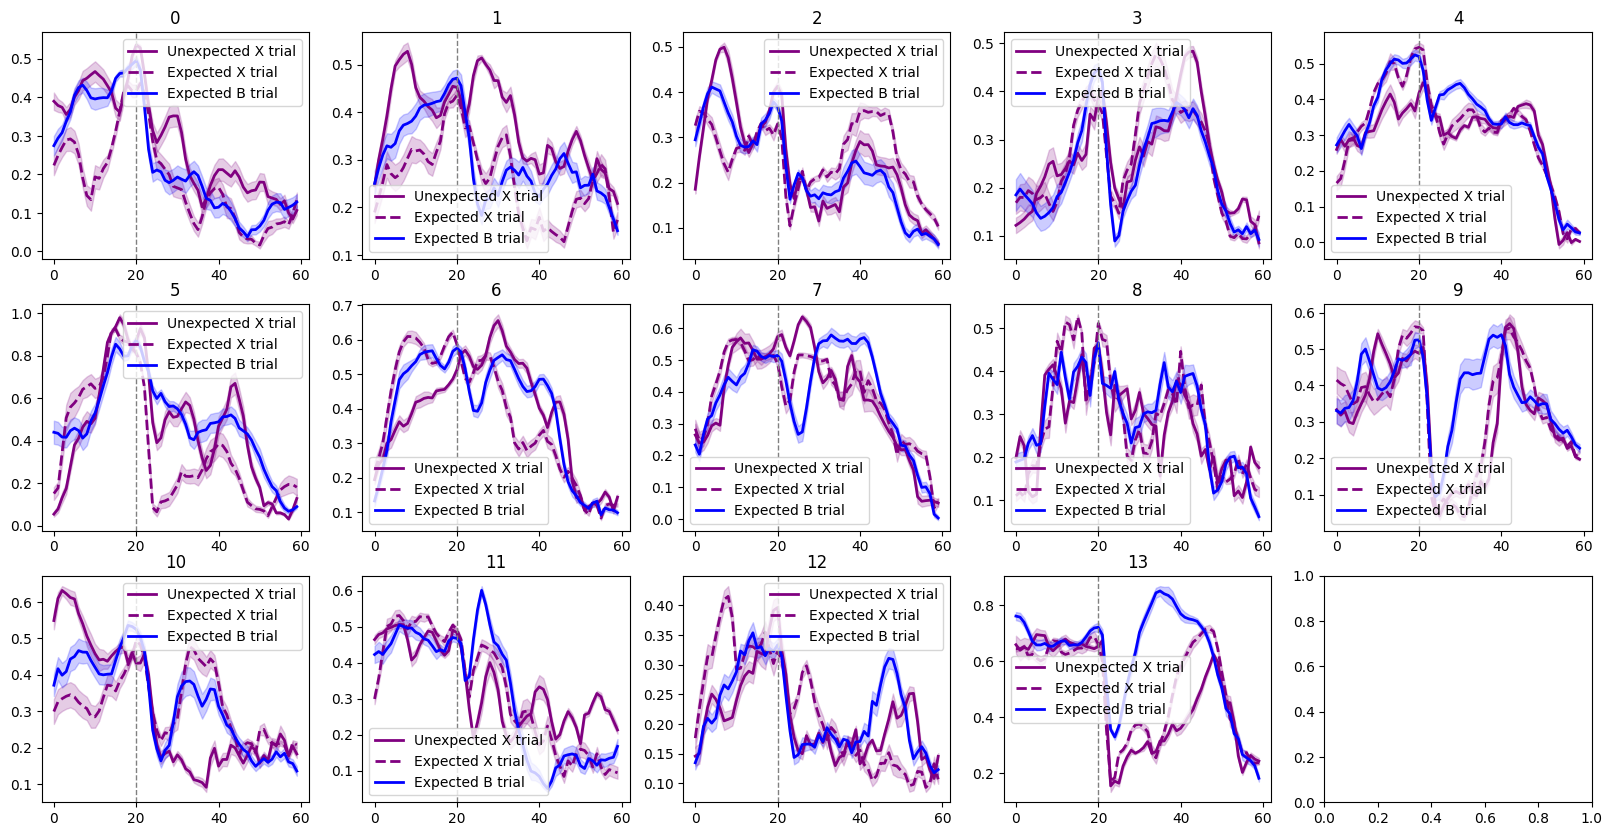

In [21]:
# different animals' speed in grating 2
# unexpected X trial :7
# expected X trial 7:15
# expected B trial :15

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
t_frames = data[ani]['activity']['gr_2'].shape[2]
for i, ani in enumerate(data):
    row = i // 5
    col = i % 5
    ax = axes[row, col] 
    af.plot_shaded_error(ax, range(t_frames), data[ani]['speed'][unexp_grat[ani][:7]], color='purple', alpha=0.2, label='Unexpected X trial')
    af.plot_shaded_error(ax, range(t_frames), data[ani]['speed'][unexp_grat[ani][7:15]], color='purple', alpha=0.2, style='dash', label='Expected X trial')
    af.plot_shaded_error(ax, range(t_frames), data[ani]['speed'][exp_grat[ani][:15]], color='blue', alpha=0.2, label= 'Expected B trial')
    ax.axvline(x=20, color='gray', linestyle='--', linewidth=1)
    ax.set_title(f'{ani}')
    ax.legend()
    

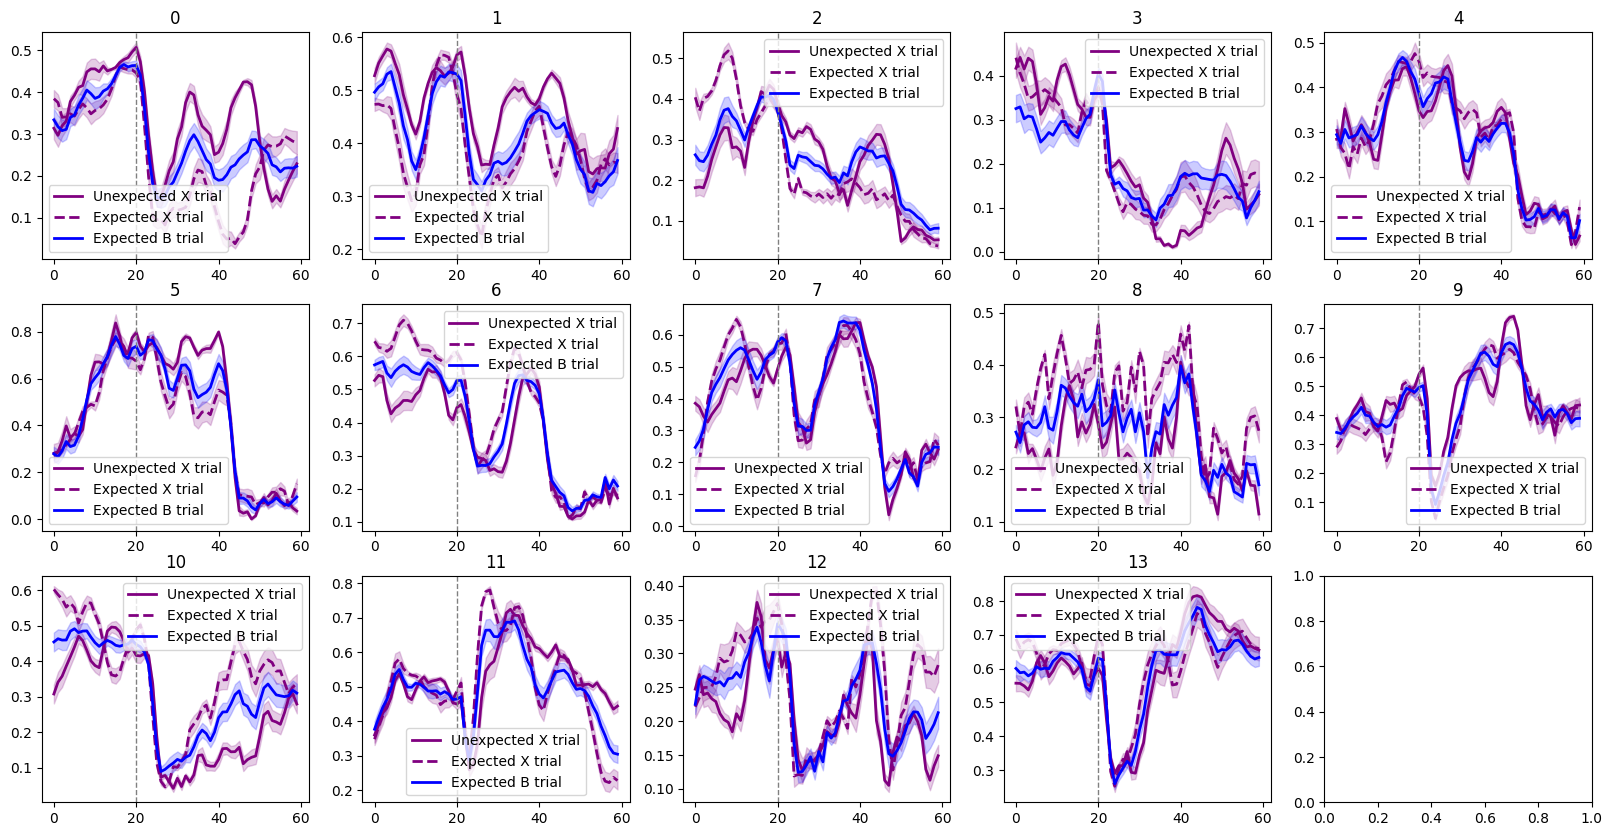

In [ ]:
# different animals' speed in grating 1
# unexpected X trial :7
# expected X trial 7:15
# expected B trial :15


for ani in data:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data[ani]['pred_trials']:
        unexp_grat[ani].append(data[ani]['grating_indices']['gr_1'][trial])
    for trial in data[ani]['pred_trials']:
        exp_grat[ani].append(data[ani]['grating_indices']['gr_1'][trial-1])

fig, axes = plt.subplots(3, 5, figsize=(20, 10))
t_frames = data[ani]['activity']['gr_1'].shape[2]
for i, ani in enumerate(data):
    row = i // 5
    col = i % 5
    ax = axes[row, col] 
    af.plot_shaded_error(ax, range(t_frames), data[ani]['speed'][unexp_grat[ani][:7]], color='purple', alpha=0.2, label='Unexpected X trial')
    af.plot_shaded_error(ax, range(t_frames), data[ani]['speed'][unexp_grat[ani][7:15]], color='purple', alpha=0.2, style='dash', label='Expected X trial')
    af.plot_shaded_error(ax, range(t_frames), data[ani]['speed'][exp_grat[ani][:15]], color='blue', alpha=0.2, label= 'Expected B trial')
    ax.axvline(x=20, color='gray', linestyle='--', linewidth=1)
    ax.set_title(f'{ani}')
    ax.legend()
    

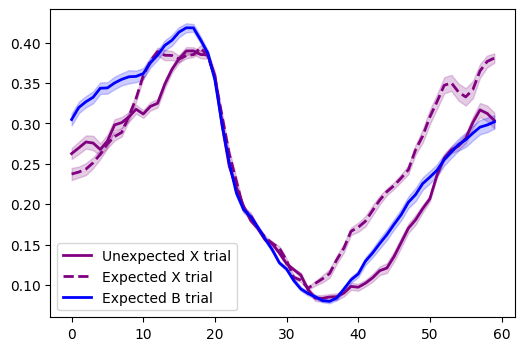

In [93]:
# Speed near the reward average over animals

unexp_rw = {}
exp_rw = {}
for ani in data:
    unexp_rw[ani] = []
    exp_rw[ani] = []
    for trial in data[ani]['unpred_trials']['gr_2']:
        unexp_rw[ani].append(data[ani]['reward_indices'][trial])
    for trial in data[ani]['unpred_trials']['gr_2']:
        exp_rw[ani].append(data[ani]['reward_indices'][trial-1])

fig, axes = plt.subplots(figsize = (6, 4))
af.plot_shaded_error(axes, range(60), np.mean(np.stack([data[ani]['speed'][unexp_rw[ani][:7]] for ani in data]), axis = 0), color='purple', alpha=0.2, label='Unexpected X trial')
af.plot_shaded_error(axes, range(60), np.mean(np.stack([data[ani]['speed'][unexp_rw[ani][20:28]] for ani in data]), axis = 0), color='purple', alpha=0.2, style='dash', label='Expected X trial')
af.plot_shaded_error(axes, range(60), np.mean(np.stack([data[ani]['speed'][exp_rw[ani][:15]] for ani in data]), axis = 0), color='blue', alpha=0.2, label= 'Expected B trial')

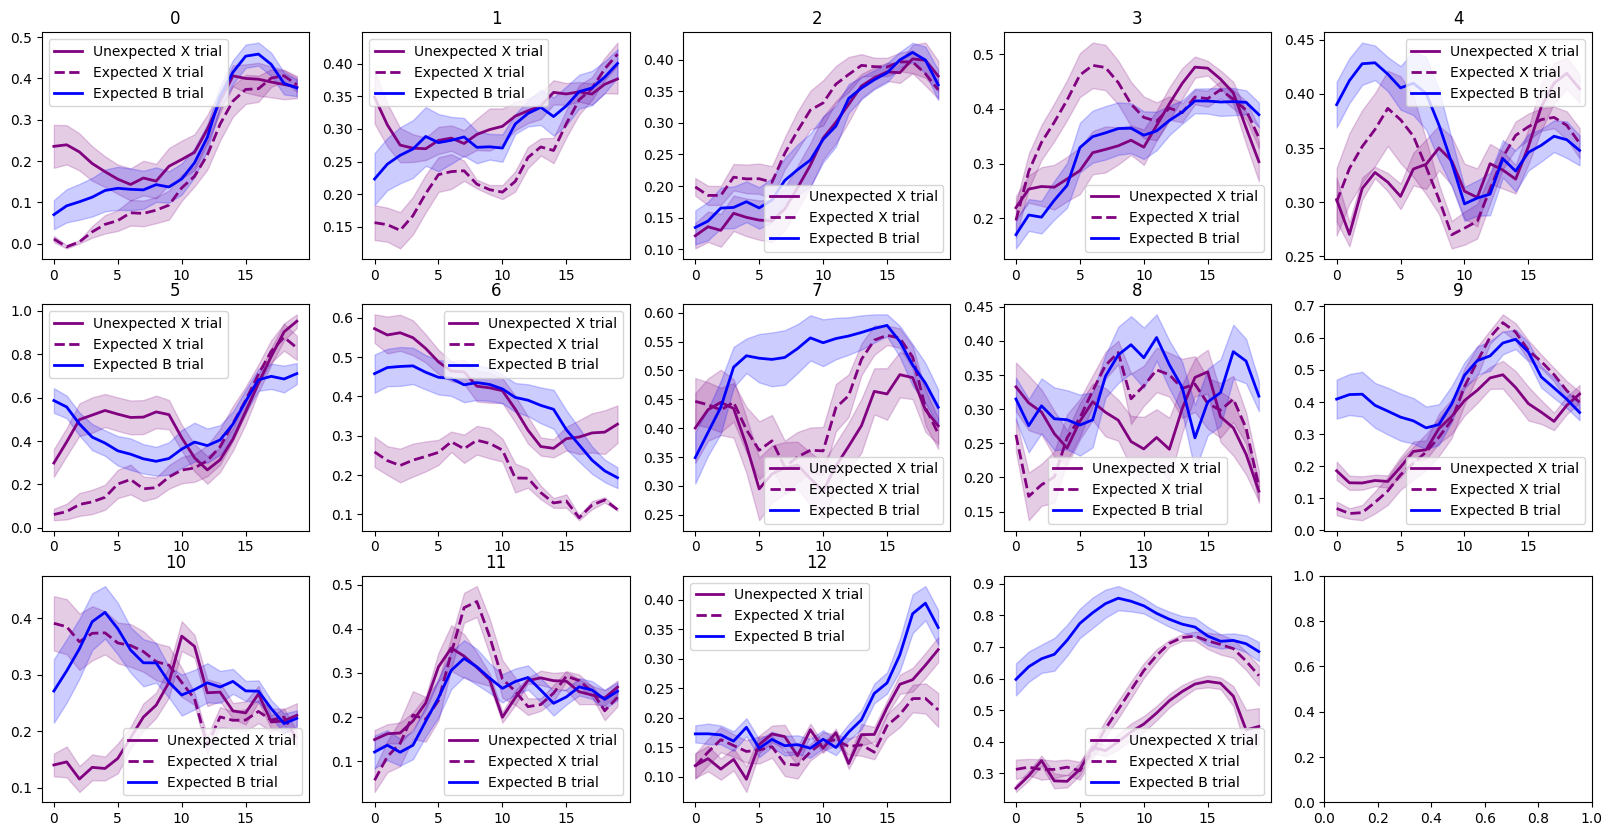

In [92]:
# Speed near the reward for each animal 

fig, axes = plt.subplots(3, 5, figsize=(20, 10)) 
for i, ani in enumerate(data):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    af.plot_shaded_error(ax, range(20), data[ani]['speed'][np.array(unexp_rw[ani][:7])[:,:20]], color='purple', alpha=0.2, label='Unexpected X trial')
    af.plot_shaded_error(ax, range(20), data[ani]['speed'][np.array(unexp_rw[ani][7:15])[:,:20]], color='purple', alpha=0.2, style='dash', label='Expected X trial')
    af.plot_shaded_error(ax, range(20), data[ani]['speed'][np.array(exp_rw[ani][:15])[:,:20]], color='blue', alpha=0.2, label= 'Expected B trial')
    ax.set_title(f'{ani}')
    ax.legend()

In [ ]:
# Licking
# specific conditions under which the sensory prediction errors are amplified more profoundly? --- around reward?

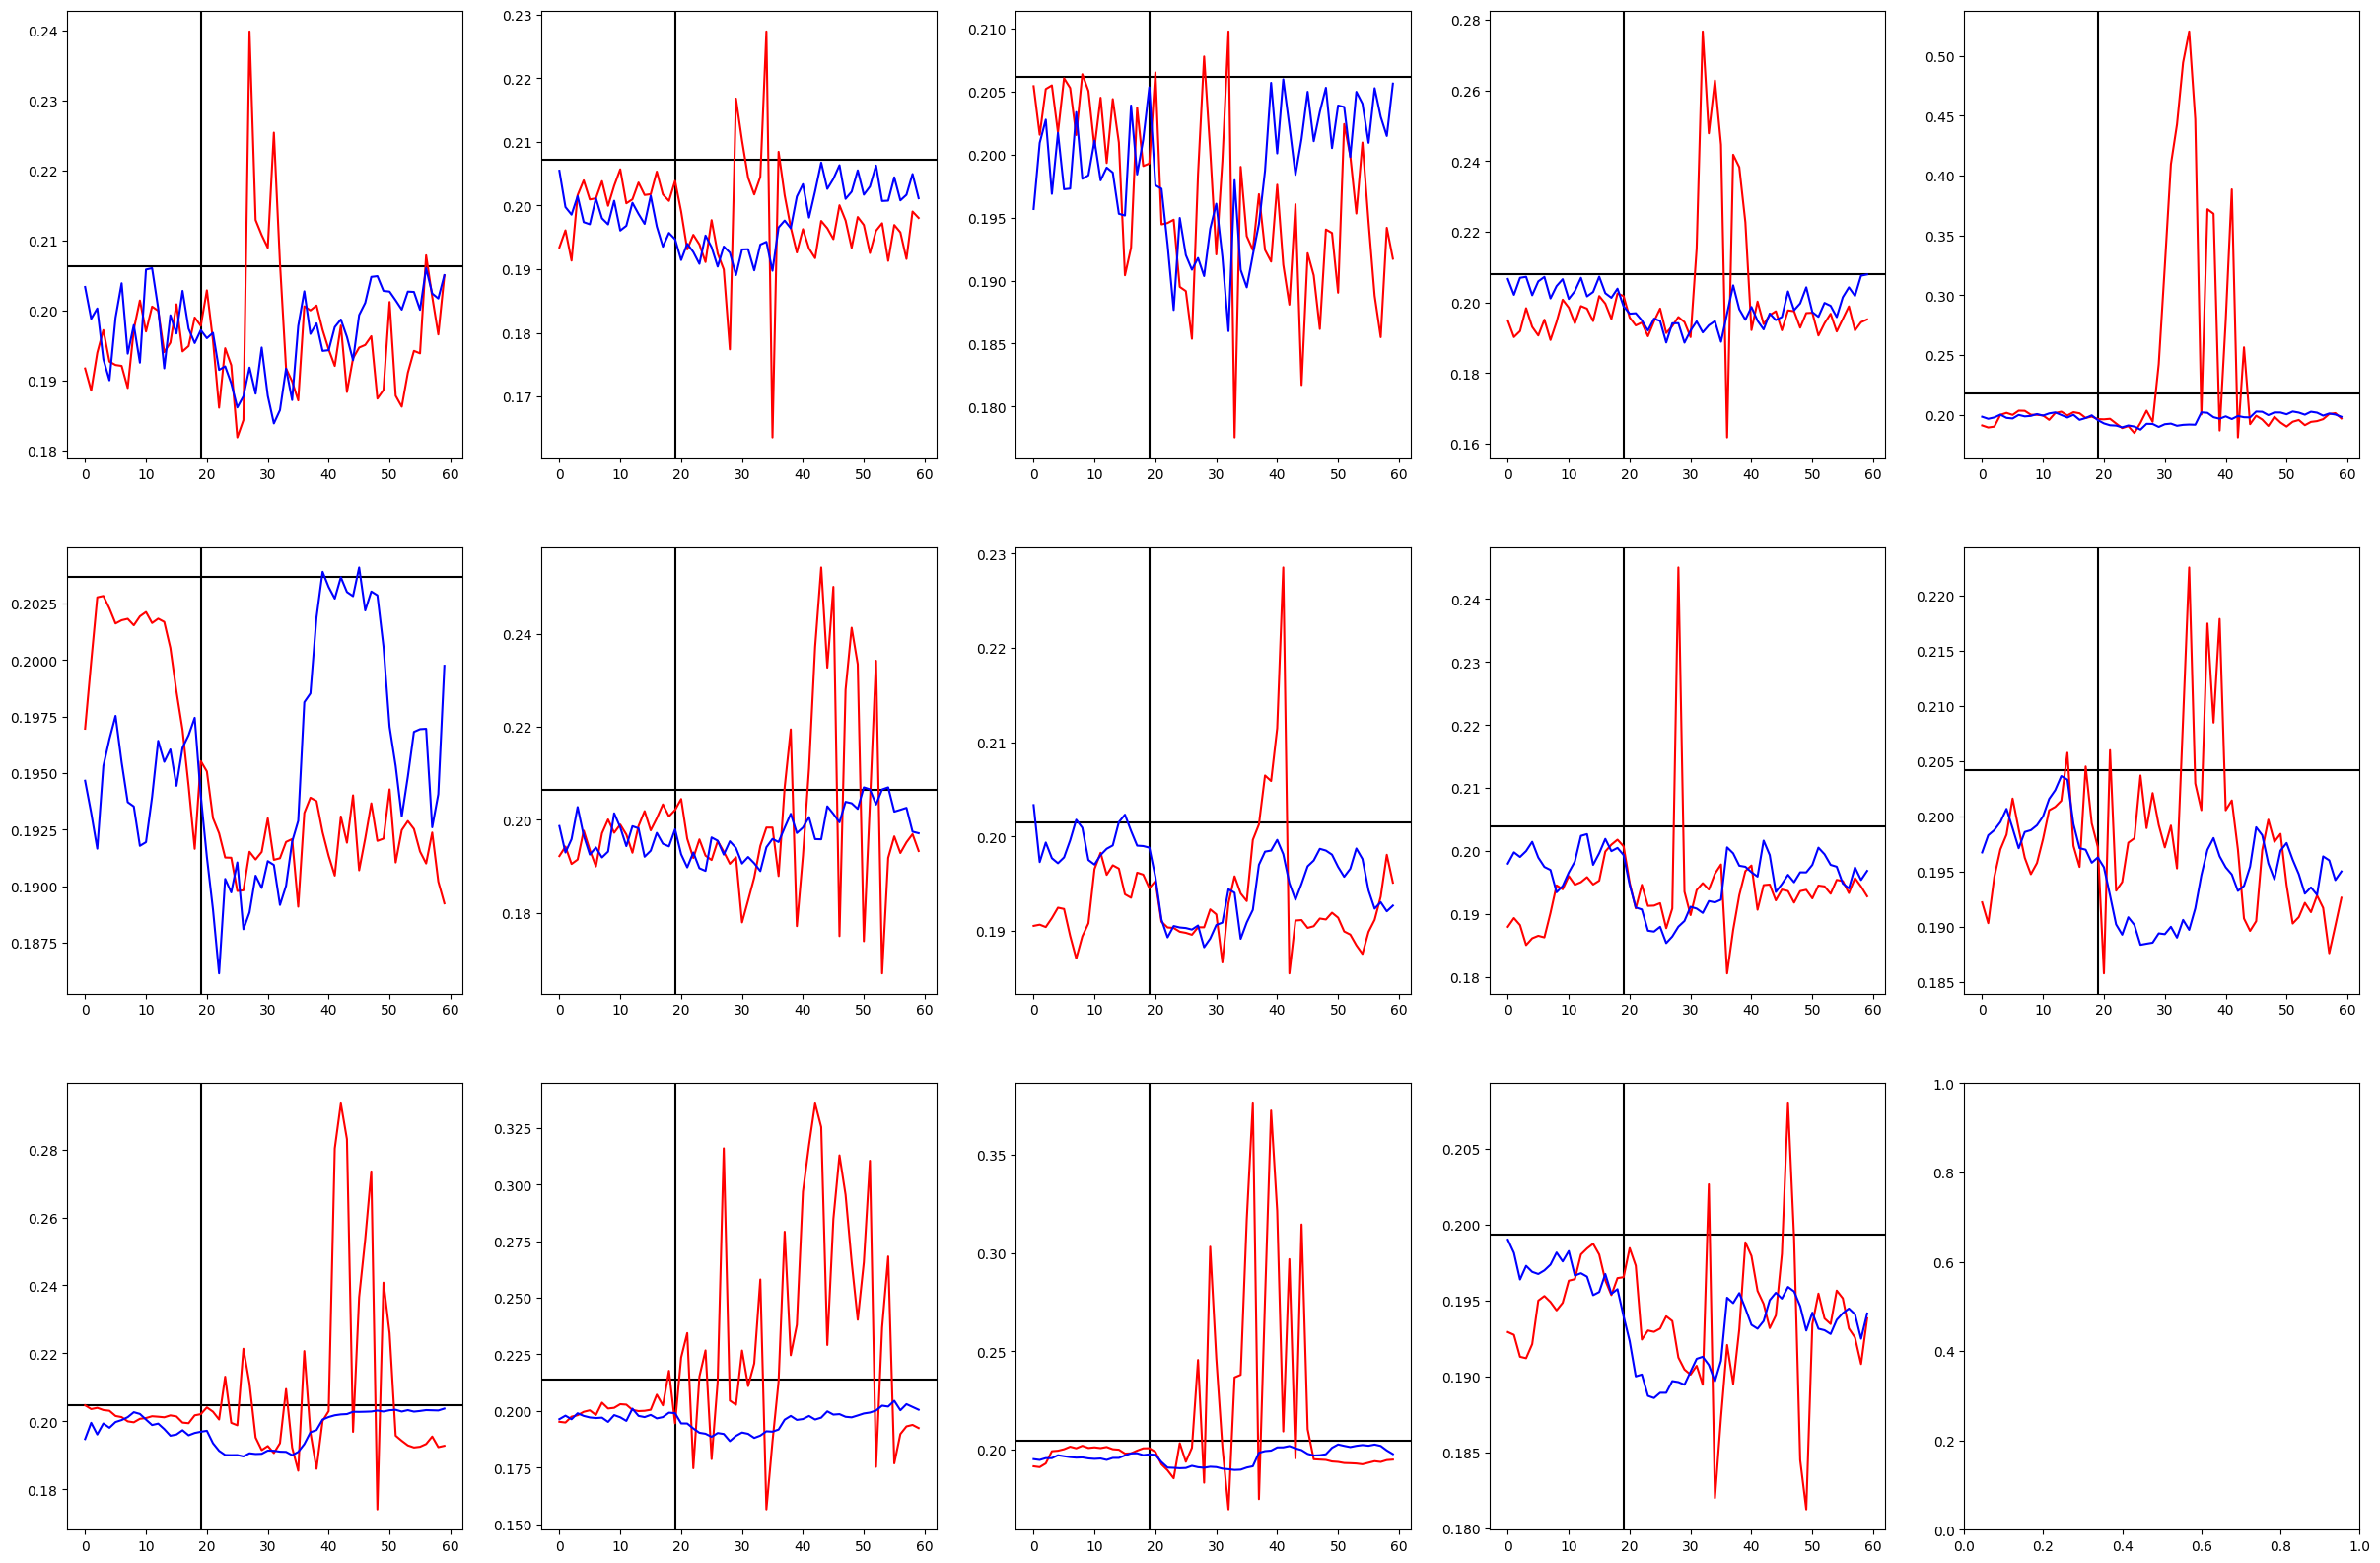

In [31]:
# convert piezo signal to licks

lick_onsets = {}
threshold = {}
for ani in data:
    lick_onsets[ani] = []
    lick_signal = gaussian_filter1d(data[ani]['lick'], sigma=.5, axis=0)  # smooth the lick data
    threshold[ani] = np.percentile(lick_signal,90,axis=0)
    max_valid =  0.5 # upper bound for real licks vs animal pushing licktube
    lick_signal = np.clip(lick_signal, a_min=None, a_max=max_valid)
    above = lick_signal > threshold[ani]
    min_interval = 2.5 #  refractory period
    crossings = np.where((~above[:-1]) & (above[1:]))[0] + 1  
    if len(crossings) > 0:
        lick_onsets[ani] = [crossings[0]]
        for idx in crossings[1:]:
            if idx - lick_onsets[ani][-1] >= min_interval:
                lick_onsets[ani].append(idx)
        lick_onsets[ani] = np.array(lick_onsets[ani])
    else:
        lick_onsets[ani] = np.array([])

trinum =99
fig, axes = plt.subplots(3, 5, figsize=(30, 20)) 
for i, ani in enumerate(data):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    lick_signal = gaussian_filter1d(data[ani]['lick'], sigma=.5, axis=0)
    ax.axhline(threshold[ani],color='k')
    ax.axvline(19,color='k')
    ax.plot(lick_signal[data[ani]['reward_indices'][trinum]],color='r')
    ax.plot(lick_signal[np.array(data[ani]['grating_indices']['gr_1'][trinum])],color='b')
    # ax.set_ylim([0.15,.22])

89


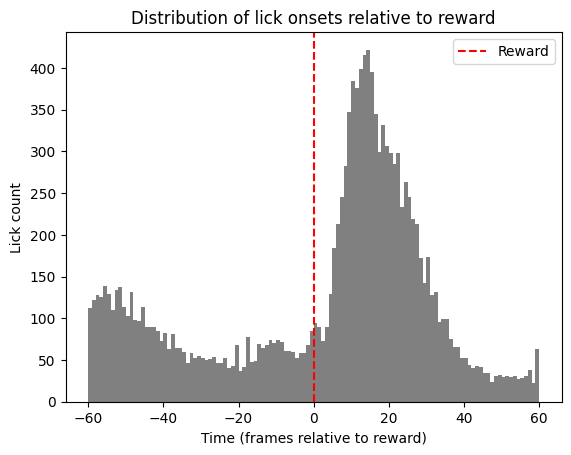

In [ ]:
# Distribution of licks relative to reward 

# all_rel_licks = []
# ani = 12
# window = 60
# miss = 0   # animal miss the reward
# for ani in data:
#     for rw_frame in data[ani]['reward_indices']:
#         reward_time = rw_frame[19]
#         licks = lick_onsets[ani]
#         aligned_licks = licks[(licks >= reward_time - window) & (licks <= reward_time + window)] # licks是一个记录了lick位置的list，这样就相当于只取那些在这一个frame的reward time周围的licks，没有也没关系
#         if len(aligned_licks) == 0 :
#             miss += 1
#         all_rel_licks.extend(aligned_licks - reward_time)
# print(miss)
# plt.hist(all_rel_licks, bins=range(-window, window+1), color='gray')
# plt.axvline(0, color='red', linestyle='--', label='Reward')
# plt.xlabel('Time (frames relative to reward)')
# plt.ylabel('Lick count')
# plt.title('Distribution of lick onsets relative to reward')
# plt.legend()
# plt.show()

In [39]:
# calculate the lick rate

# lick_rate = {}
# frame_rate = 7
# for ani in data:
#     lick_rate[ani] = []
#     lick_onset_frames = lick_onsets[ani]  # array of lick frame indices
#     total_frames = data[ani]['lick'].shape[0]
#     total_seconds = int(total_frames // frame_rate) # Total number of seconds in this session
#     for sec in range(int(total_seconds)):
#         start_frame = sec * frame_rate
#         end_frame = (sec + 1) * frame_rate
#         n_licks = np.sum((lick_onset_frames >= start_frame) & (lick_onset_frames < end_frame))
#         for i in range(7):
#             lick_rate[ani].append(n_licks) # each frame has a lick_freq
#     lick_rate[ani] = np.array(lick_rate[ani]) # convert to np array


# Calculate the lick rate
lick_rate = {}
frame_rate = 7.5
offset = int(frame_rate // 2)
for ani in data:
    lick_rate_temp = np.zeros(data[ani]['lick'].shape[0])
    lick_onset_set = set(lick_onsets[ani])
    for fr in range(data[ani]['lick'].shape[0] - int(frame_rate)):
        count = sum((fr + i) in lick_onset_set for i in range(int(frame_rate)))
        center_idx = fr + offset
        lick_rate_temp[center_idx] = count
    lick_rate[ani] = lick_rate_temp


# lick record for each animal, 1 for a lick and 0 for no lick
lick_record = {}
for ani in data:
    lick_record[ani] = np.zeros(data[ani]['lick'].shape[0])
    lick_record[ani][lick_onsets[ani]] = 1

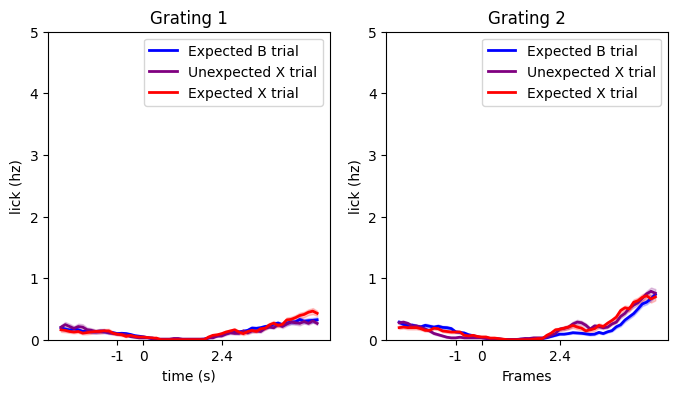

In [91]:
# Lick rate at gratings averaged over all animals

for ani in data:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data[ani]['grating_indices']['gr_1'][trial])
    for trial in data[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data[ani]['grating_indices']['gr_1'][trial-1])
fig,axes = plt.subplots(1,2,figsize=(8,4))
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([lick_rate[ani][exp_grat[ani][:15]] for ani in data]), axis = 1),color='blue', alpha=0.2, ylim = 0,  label= 'Expected B trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([lick_rate[ani][unexp_grat[ani][:7]] for ani in data]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[0], range(t_frames), np.mean(np.stack([lick_rate[ani][unexp_grat[ani][7:15]] for ani in data]), axis = 1),color='red', alpha=0.2,label= 'Expected X trial')
axes[0].set_title('Grating 1')
axes[0].set_xlabel('Frames')
axes[0].set_ylabel('Lick')
axes[0].legend()
plt.setp(axes,ylim=[0,5], xticks=[13,19,37], xticklabels=['-1','0', '2.4'],xlabel='time (s)', ylabel='lick (hz)')

for ani in data:
    unexp_grat[ani] = []
    exp_grat[ani] = []
    for trial in data[ani]['unpred_trials']['gr_2']:
        unexp_grat[ani].append(data[ani]['grating_indices']['gr_2'][trial])
    for trial in data[ani]['unpred_trials']['gr_2']:
        exp_grat[ani].append(data[ani]['grating_indices']['gr_2'][trial-1])
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([lick_rate[ani][exp_grat[ani][:15]] for ani in data]), axis = 1),color='blue', alpha=0.2, label= 'Expected B trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([lick_rate[ani][unexp_grat[ani][:7]] for ani in data]), axis = 1) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes[1], range(t_frames), np.mean(np.stack([lick_rate[ani][unexp_grat[ani][7:15]] for ani in data]), axis = 1),color='red', alpha=0.2,label= 'Expected X trial')
axes[1].set_title('Grating 2')
axes[1].set_xlabel('Frames')
axes[1].legend()

Text(0.5, 1.0, 'Lick Near Reward')

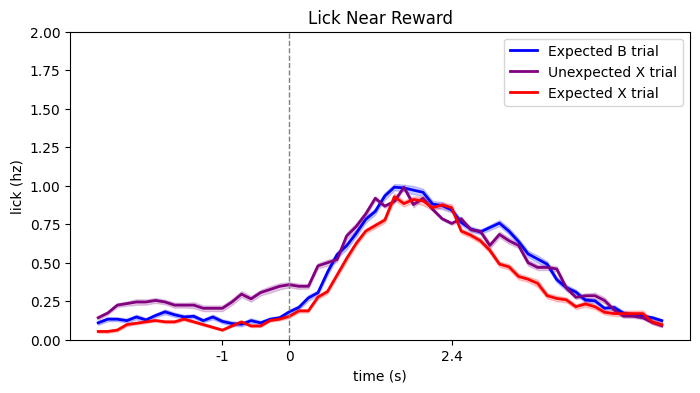

In [89]:
# Lick near reward average over animals, lick numbers

fig,axes = plt.subplots(1,1,figsize=(8,4))
t_frames = data[ani]['activity']['gr_1'].shape[2]
af.plot_shaded_error(axes, range(t_frames), np.mean(np.stack([lick_rate[ani][exp_rw[ani][:15]] for ani in data]), axis = 0),color='blue', alpha=0.2, label= 'Expected B trial')
af.plot_shaded_error(axes, range(t_frames), np.mean(np.stack([lick_rate[ani][unexp_rw[ani][:7]] for ani in data]), axis = 0) ,color='purple', alpha=0.2,label = 'Unexpected X trial')
af.plot_shaded_error(axes, range(t_frames), np.mean(np.stack([lick_rate[ani][unexp_rw[ani][20:28]] for ani in data]), axis = 0),color='red', alpha=0.2,label= 'Expected X trial')
plt.setp(axes,ylim=[0,2], xticks=[13,20,37], xticklabels=['-1','0', '2.4'],xlabel='time (s)', ylabel='lick (hz)')
axes.axvline(x=20, color='gray', linestyle='--', linewidth=1)
axes.set_title('Lick Near Reward')

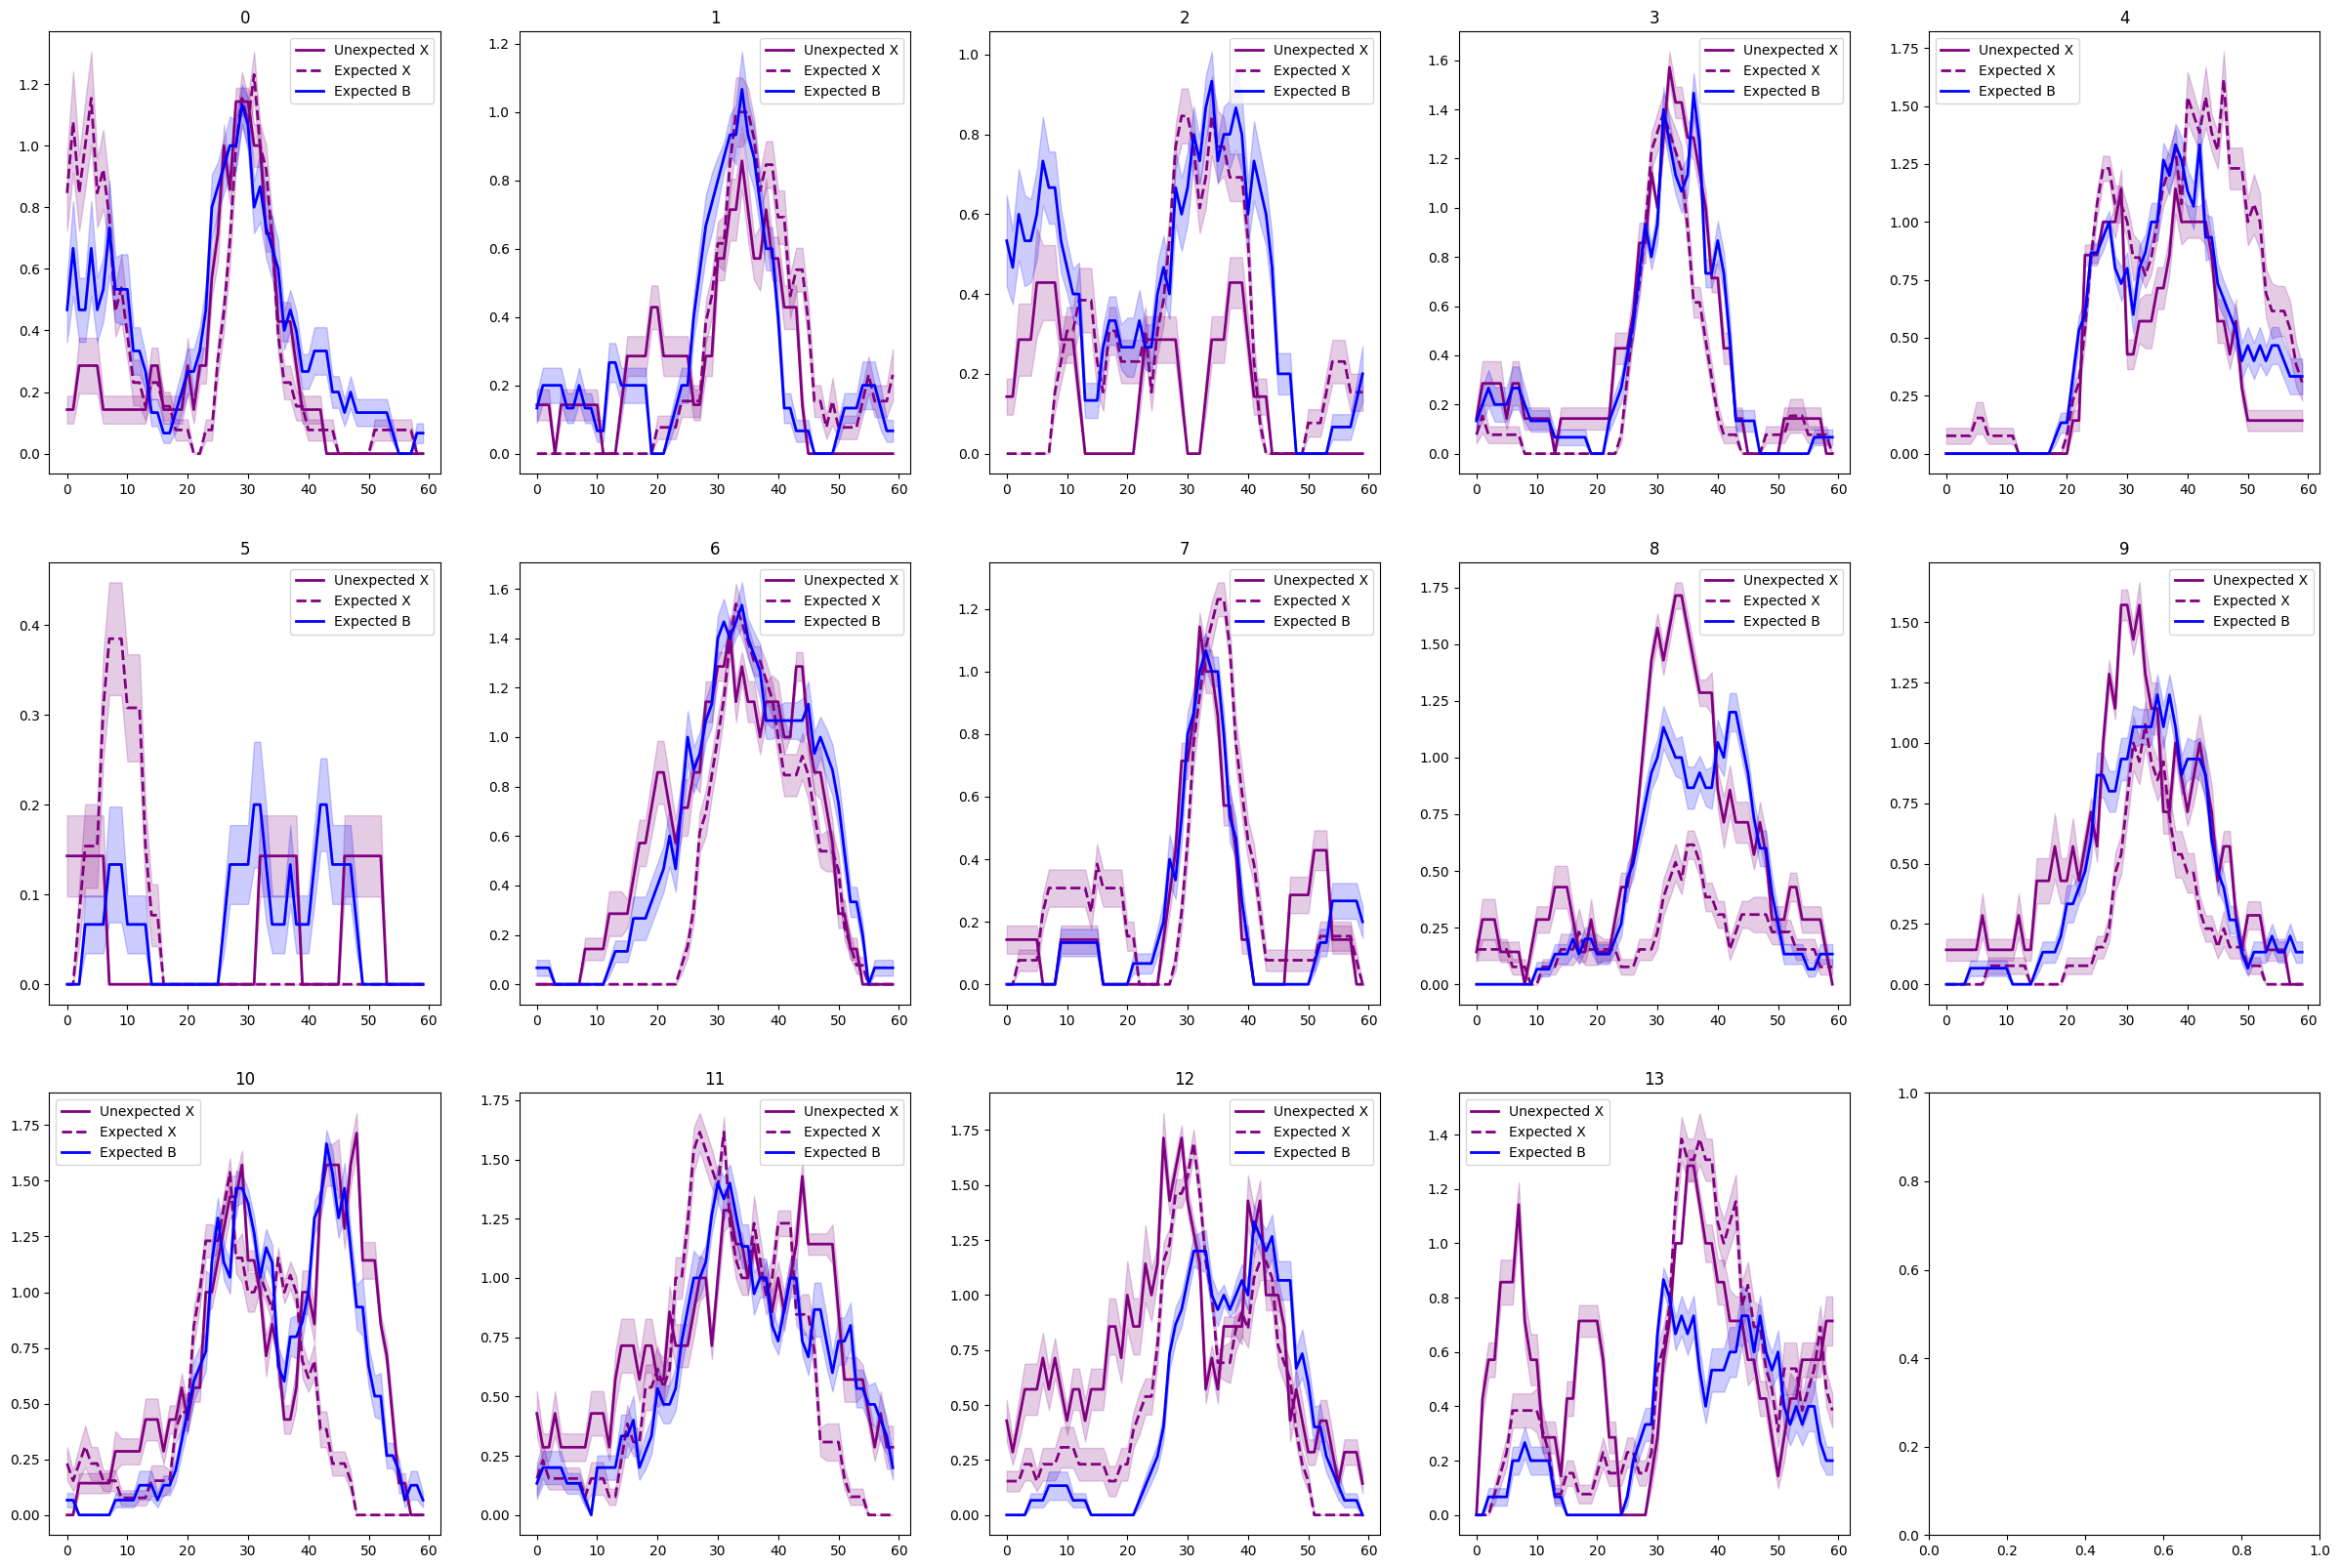

In [88]:
# Lick Rate Near Reward each animal
fig, axes = plt.subplots(3, 5, figsize=(30, 20)) 
for i, ani in enumerate(data):
    row = i // 5
    col = i % 5
    ax = axes[row, col]
    af.plot_shaded_error(ax, range(t_frames), lick_rate[ani][unexp_rw[ani][:7]], color='purple', alpha=0.2, label='Unexpected X')
    af.plot_shaded_error(ax, range(t_frames), lick_rate[ani][unexp_rw[ani][15:28]], color='purple', alpha=0.2, style='dash', label='Expected X')
    af.plot_shaded_error(ax, range(t_frames), lick_rate[ani][exp_rw[ani][:15]], color='blue', alpha=0.2, label= 'Expected B')
    ax.set_title(f'{ani}')
    ax.legend()

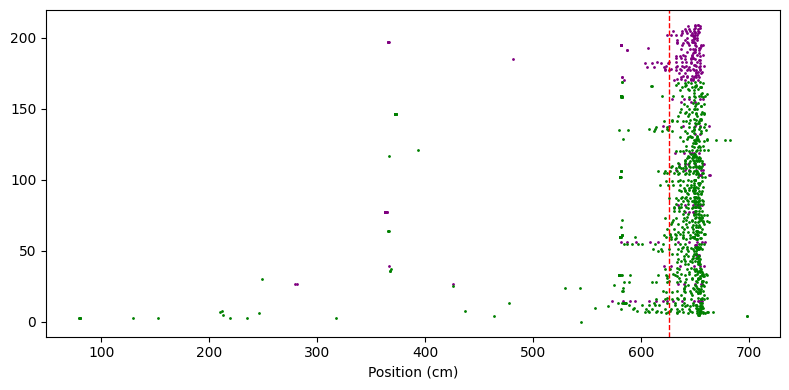

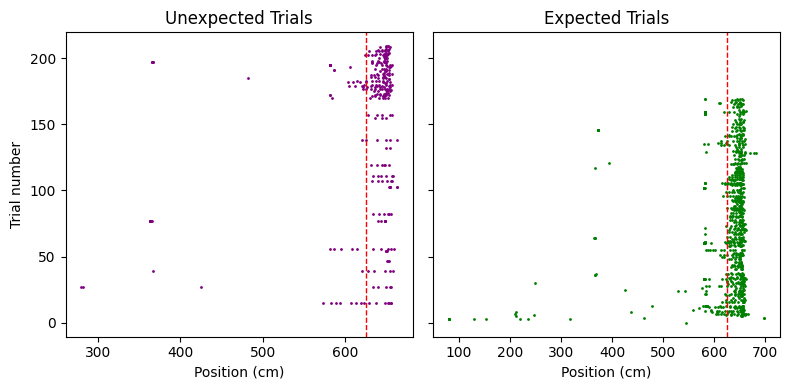

In [ ]:
ani = 11
ani_positions = data[ani]['real_position'] * 700/5
aligned_exp = []
aligned_unexp = []
for i, trial_start in enumerate(data[ani]['trial_start_indices']):
    if i < len(data[ani]['trial_start_indices']) - 1:  
        trial_end = data[ani]['trial_start_indices'][i+1]
    else:
        trial_end = len(data[ani]['real_position'])
    for num, lick in enumerate(lick_record[ani][trial_start:trial_end]):
        if lick == 1 and i in data[ani]['unpred_trials']['gr_2']:
            aligned_unexp.append([i,ani_positions[trial_start:trial_end][num]])
        if lick ==1 and i in data[ani]['pred_trials']:
            aligned_exp.append([i,ani_positions[trial_start:trial_end][num]])
aligned_exp = np.array(aligned_exp)
aligned_unexp = np.array(aligned_unexp)

fig, axes = plt.subplots(figsize=(8,4))
axes.scatter(aligned_unexp[:, 1], aligned_unexp[:, 0], s=1, c='purple')
axes.scatter(aligned_exp[:, 1], aligned_exp[:, 0], s=1, c='green')
axes.axvline(x=4.47*700/5, color='red', linestyle='--', linewidth=1)
axes.set_xlabel('Position (cm)')
plt.tight_layout()
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(8, 4), sharey=True)
# Unexpected trials
axes[0].scatter(aligned_unexp[:, 1], aligned_unexp[:, 0], s=1, c='purple')
axes[0].axvline(x=4.47*700/5, color='red', linestyle='--', linewidth=1)
axes[0].set_title('Unexpected Trials')
axes[0].set_xlabel('Position (cm)')
axes[0].set_ylabel('Trial number')
# Expected trials
axes[1].scatter(aligned_exp[:, 1], aligned_exp[:, 0], s=1, c='green')
axes[1].axvline(x=4.47*700/5, color='red', linestyle='--', linewidth=1)
axes[1].set_title('Expected Trials')
axes[1].set_xlabel('Position (cm)')
plt.tight_layout()
plt.show()

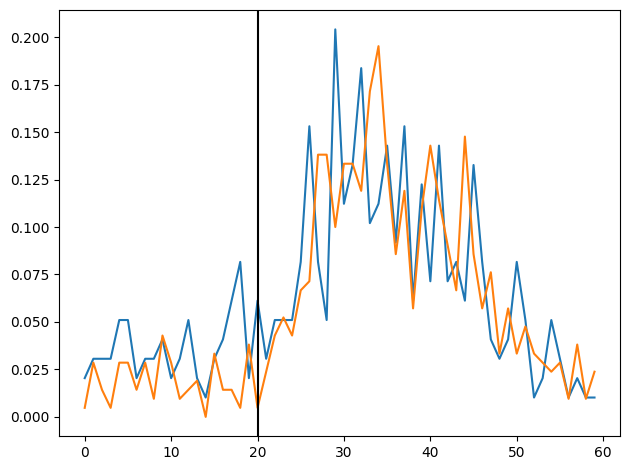

In [ ]:
# line chart, unexp v.s. exp, lick record
plt.figure()
plt.plot(np.mean(np.mean(np.stack([lick_record[ani][unexp_rw[ani][:7]] for ani in data]), axis=1), axis = 0))
plt.plot(np.mean(np.mean(np.stack([lick_record[ani][exp_rw[ani][:15]] for ani in data]), axis=1), axis = 0))
plt.axvline(x=20, c = 'black')
plt.tight_layout()
plt.show()

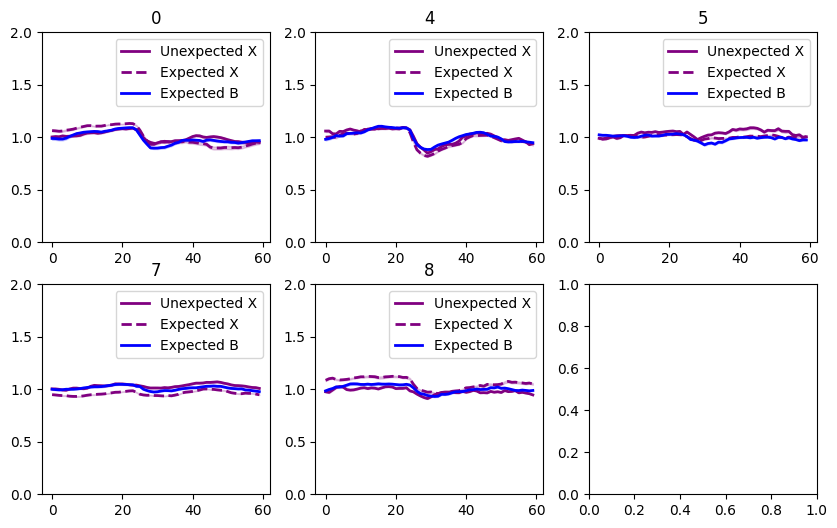

In [128]:
# Pupil Size near grating for each animal normalised

normalised_pupil = {}
for ani in data:
    normalised_pupil[ani] = data[ani]['pupil']/ np.nanmedian(data[ani]['pupil'])

fig, axes = plt.subplots(2, 3, figsize=(10, 6)) 
axes = axes.flatten()
for i, ani in enumerate([0,4,5,7,8]):
    ax = axes[i]
    af.plot_shaded_error(ax, range(t_frames), normalised_pupil[ani][unexp_grat[ani][:7]], color='purple', alpha=0.2, label='Unexpected X')
    af.plot_shaded_error(ax, range(t_frames), normalised_pupil[ani][unexp_grat[ani][15:28]], color='purple', alpha=0.2, style='dash', label='Expected X')
    af.plot_shaded_error(ax, range(t_frames), normalised_pupil[ani][exp_grat[ani][:15]], color='blue', alpha=0.2, label= 'Expected B')
    ax.set_ylim([0,2])
    ax.set_title(f'{ani}')
    ax.legend()

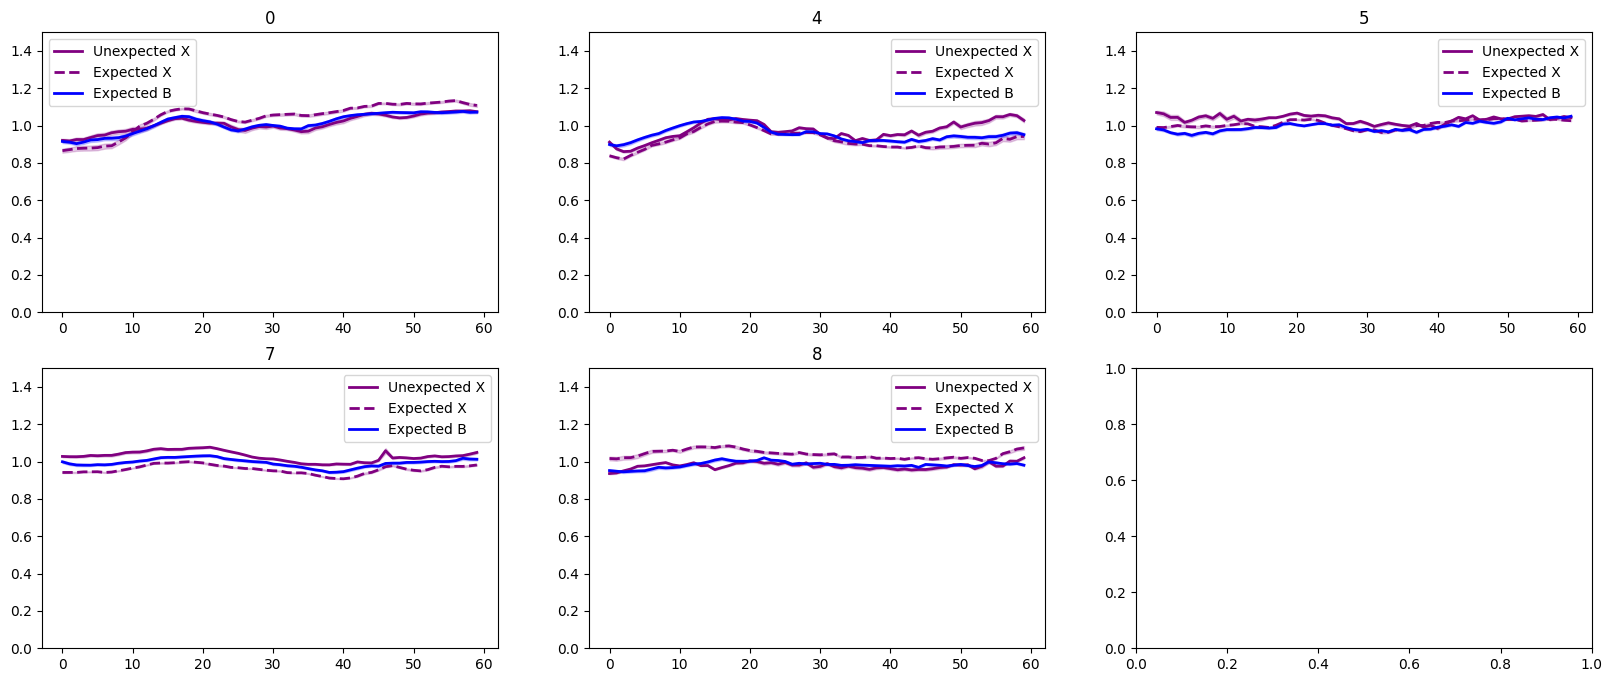

In [ ]:
# Pupil Size near reward for each animal normalised

fig, axes = plt.subplots(2, 3, figsize=(20, 8)) 
axes = axes.flatten()
for i, ani in enumerate([0,4,5,7,8]):
    ax = axes[i]
    af.plot_shaded_error(ax, range(t_frames), normalised_pupil[ani][unexp_rw[ani][:7]], color='purple', alpha=0.2, label='Unexpected X')
    af.plot_shaded_error(ax, range(t_frames), normalised_pupil[ani][unexp_rw[ani][15:28]], color='purple', alpha=0.2, style='dash', label='Expected X')
    af.plot_shaded_error(ax, range(t_frames), normalised_pupil[ani][exp_rw[ani][:15]], color='blue', alpha=0.2, label= 'Expected B')
    ax.set_ylim([0,1.5])
    ax.set_title(f'{ani}')
    ax.legend()

In [88]:
# fig,axes = plt.subplots(1,1,figsize=(7,6))
# for ani in data:
#     deltaspeed_pre = np.mean(np.diff(np.mean(data[ani]['speed'][unexp_grat[ani][:15]],axis=0))[slice(9,17)],axis=0)
#     deltaspeed_post = np.mean(np.diff(np.mean(data[ani]['speed'][unexp_grat[ani][:15]],axis=0))[slice(23,38)],axis=0)
#     axes.plot(deltaspeed_pre,deltaspeed_post, marker = 'o', color= 'k')
#     axes.set_xlabel('pre delta speed')
#     axes.set_ylabel('post delta speed')

# fig,axes = plt.subplots(1,1,figsize=(10,6))
# plt.plot(data[ani]['speed'][unexp_tr[ani][0]] ,color='purple',label ='X block 1')
# plt.plot(data[ani]['speed'][exp_tr[ani][0]] ,color='blue',label ='X block 1')